In [64]:
import quandl
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

%matplotlib inline


In [122]:
MORTG = quandl.get("FMAC/MORTG", trim_start = "2000-01-01", trim_end = "2018-03-01", authtoken=auth_tok)
UNRATE = quandl.get("FRED/UNRATE", trim_start = "2000-01-01", trim_end = "2018-03-01", authtoken=auth_tok)
#USA_NGDP_RPCH = quandl.get("ODA/USA_NGDP_RPCH", trim_start = "2010-01-01", trim_end = "2018-03-01", authtoken=auth_tok)
CPI_USA = quandl.get("RATEINF/CPI_USA", trim_start = "2000-12-12", trim_end = "2018-03-01", authtoken=auth_tok)
HPI = quandl.get("FMAC/HPI", trim_start = "2000-12-12", trim_end = "2018-03-01", authtoken=auth_tok)

In [123]:
data_frames = [MORTG, UNRATE, CPI_USA]


In [124]:



data_frames[0]=data_frames[0].pct_change()
data_frames[1]=data_frames[1].pct_change()



df2 = pd.merge(data_frames[0], data_frames[1], left_index=True, right_index=True)
#df3 =  pd.merge(df2, data_frames[2], left_index=True, right_index=True)
#MORTG.join(UNRATE)
df2['month'] = pd.DatetimeIndex(df2.index).month
df2['year'] = pd.DatetimeIndex(df2.index).year
df2['month'] = pd.DatetimeIndex(df2.index).month # +1 
df2['year'] = pd.DatetimeIndex(df2.index).year
df2.head()

,Value_x,Value_y,month,year
Date,,,,
2000-01-01,NaN,NaN,1,2000
2000-02-01,0.014616,0.025000,2,2000
2000-03-01,-0.010804,-0.024390,3,2000
2000-04-01,-0.010922,-0.050000,4,2000
2000-05-01,0.045399,0.052632,5,2000


In [125]:
#CPI_USA
df7 = CPI_USA
df7= df7.pct_change()
df7['month'] = pd.DatetimeIndex(df7.index).month # +1 
df7['year'] = pd.DatetimeIndex(df7.index).year
df8 = pd.merge(df2, df7, left_on=['month', 'year'],right_on=['month', 'year'])
df8.rename(columns={'Value_x':'mortgrate', 'Value_y':'unemp','Value': 'cpi' }, inplace=True)

#df8.to_pickle('mortunempcpi.p')


In [126]:
df8.head()

,mortgrate,unemp,month,year,cpi
0,-0.047742,0.000000,12,2000,NaN
1,-0.047425,0.076923,1,2001,0.006322
2,0.002845,0.000000,2,2001,0.003998
3,-0.014184,0.023810,3,2001,0.002275
4,0.018705,0.023256,4,2001,0.003973


In [127]:
HPIUS = pd.DataFrame (HPI['United States seasonaly adjusted'].pct_change())

# That is by state
HPIUS.head()
HPIUS['month'] = pd.DatetimeIndex(HPIUS.index).month # +1 
HPIUS['year'] = pd.DatetimeIndex(HPIUS.index).year
df9 = pd.merge(HPIUS, df8, left_on=['month', 'year'],right_on=['month', 'year'])
df9 = df9.dropna()
df9.rename(columns={'United States seasonaly adjusted':'HPIUS'}, inplace=True)
df9.head()



,HPIUS,month,year,mortgrate,unemp,cpi
1,0.006723,1,2001,-0.047425,0.076923,0.006322
2,0.006981,2,2001,0.002845,0.000000,0.003998
3,0.006864,3,2001,-0.014184,0.023810,0.002275
4,0.005696,4,2001,0.018705,0.023256,0.003973
5,0.005205,5,2001,0.009887,-0.022727,0.004522


In [128]:
df9['Date'] = df9['month'].astype(str) + ' ' +df9['year'].astype(str)
df9['Date']=  pd.to_datetime(df9['Date'], format='%m %Y')
df9.set_index('Date', inplace=True)
df9.to_pickle('mortunempcpihpi.p')


Index(['HPIUS', 'month', 'year', 'mortgrate', 'unemp', 'cpi'], dtype='object')

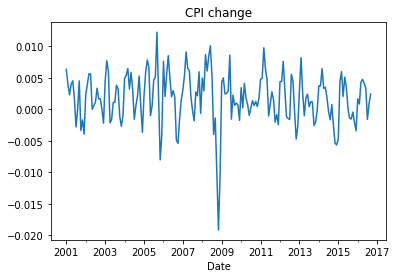

In [135]:
df9.cpi.plot(title = 'CPI change')
df9.columns

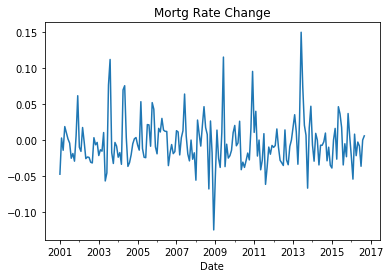

In [147]:
df9.mortgrate.plot(title = 'Mortg Rate Change')

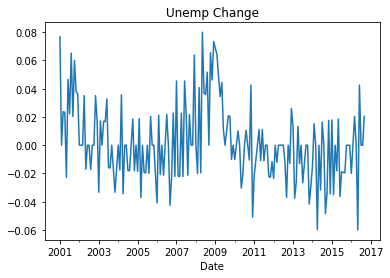

In [139]:
df9.unemp.plot(title = 'Unemp Change')


In [140]:
df9.dropna(inplace=True)

df9 = df9.replace([np.inf, -np.inf], np.nan)
df9.dropna(inplace=True)
df9.head()



,HPIUS,month,year,mortgrate,unemp,cpi
Date,,,,,,
2001-01-01,0.006723,1,2001,-0.047425,0.076923,0.006322
2001-02-01,0.006981,2,2001,0.002845,0.000000,0.003998
2001-03-01,0.006864,3,2001,-0.014184,0.023810,0.002275
2001-04-01,0.005696,4,2001,0.018705,0.023256,0.003973
2001-05-01,0.005205,5,2001,0.009887,-0.022727,0.004522


In [141]:
df9 = df9.loc[df9['unemp'] != -1]
df9

,HPIUS,month,year,mortgrate,unemp,cpi
Date,,,,,,
2001-01-01,0.006723,1,2001,-0.047425,0.076923,0.006322
2001-02-01,0.006981,2,2001,0.002845,0.000000,0.003998
2001-03-01,0.006864,3,2001,-0.014184,0.023810,0.002275
2001-04-01,0.005696,4,2001,0.018705,0.023256,0.003973
2001-05-01,0.005205,5,2001,0.009887,-0.022727,0.004522
2001-06-01,0.005134,6,2001,0.001399,0.046512,0.001688
2001-07-01,0.005546,7,2001,-0.004190,0.022222,-0.002809
2001-08-01,0.005405,8,2001,-0.025245,0.065217,0.000000
2001-09-01,0.005611,9,2001,-0.018705,0.020408,0.004507


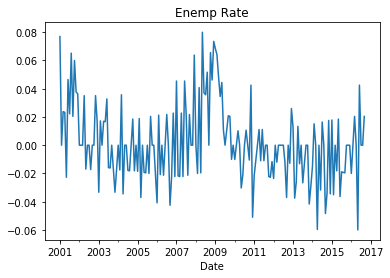

In [146]:
df9.unemp.plot(title = 'Enemp Rate')
#df9.columns

In [158]:
import statsmodels.api as sm
X = df9[[ 'mortgrate', 'unemp', 'cpi']]
y = df9['HPIUS']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HPIUS   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     7.756
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           6.60e-05
Time:                        16:32:38   Log-Likelihood:                 700.69
No. Observations:                 189   AIC:                            -1393.
Df Residuals:                     185   BIC:                            -1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.000      5.796      0.000       0.002       0.004
mortgrate      0.0229      0.013      1.712      0.089      -0.004       0.049
unemp         -0.0681      0.016     -4.150      0.000      -0.100      -0.036
cpi            0.0424      0.112      0.379      0.705      -0.178       0.263
==============================================================================
Omnibus:                       14.644   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.212
Skew:                          -0.614   Prob(JB):                     0.000820
Kurtosis:                       2.457   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

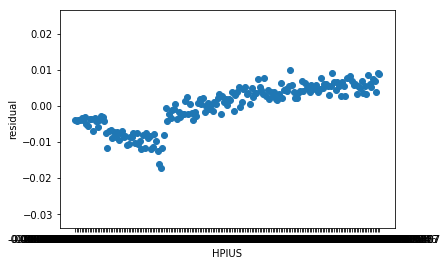

In [160]:
Y_pred = est.predict(X)
residual = df9["HPIUS"].values-Y_pred


plt.scatter(df9[["HPIUS"]],residual)
plt.xlabel("HPIUS") #X1 - a predictor")
plt.ylabel("residual")
plt.show()

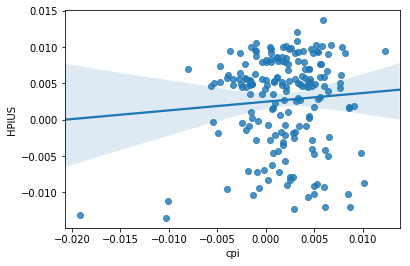

In [166]:
#sns.regplot(x="mortgrate", y="HPIUS", data=df9);
#sns.regplot(x="unemp", y="HPIUS", data=df9);
sns.regplot(x="cpi", y="HPIUS", data=df9);


In [ ]:
#'unemp', 'cpi'

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


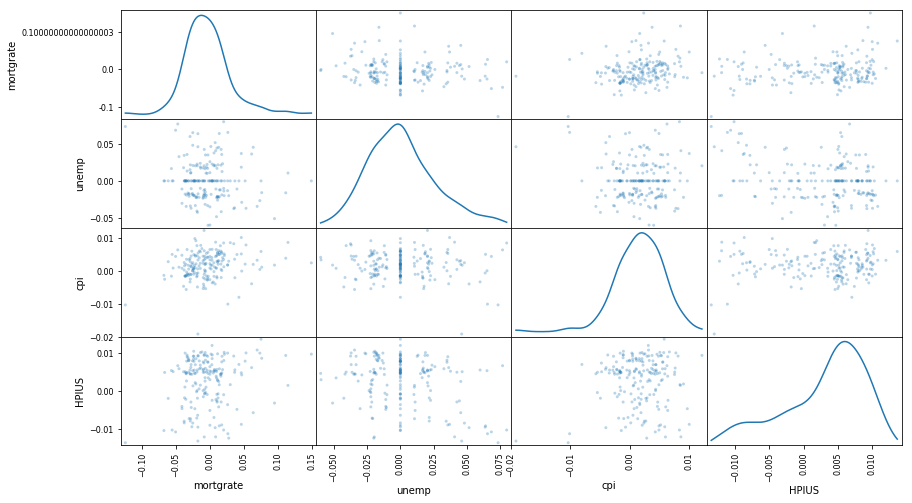

In [148]:
pd.scatter_matrix(df9[[ 'mortgrate', 'unemp', 'cpi', 'HPIUS']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');


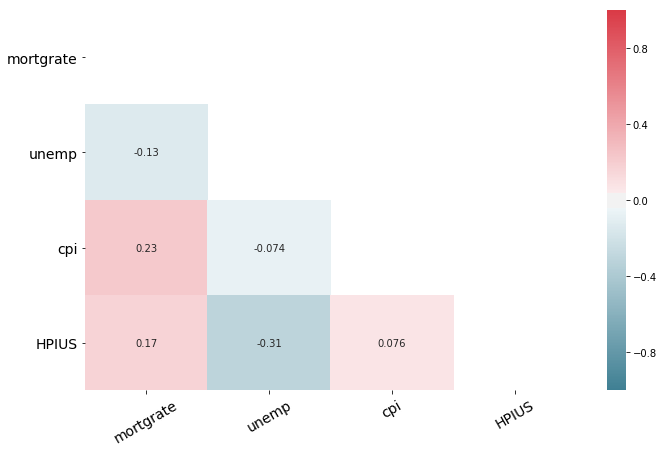

In [149]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

df_with_target = df9[[ 'mortgrate', 'unemp', 'cpi', 'HPIUS']].copy()
df_with_target['HPIUS'] = y
correlation_heat_map(df_with_target)

In [145]:
popdata  = pd.read_pickle("mergeddfclean.p")

In [58]:
popdata.head()

,county,RDEATH2016,Year,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price
0,Autauga AL,9.218433,2011-01-01,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568
1,Baldwin AL,9.868812,2011-01-01,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731
2,Barbour AL,11.632586,2011-01-01,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495
4,Blount AL,9.871136,2011-01-01,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218
7,Chambers AL,12.950211,2011-01-01,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399


In [245]:
df10 = pd.merge(popdata, df9, left_on='Year',right_on='Date', right_index = True).dropna()


In [246]:
df10.set_index('Year', inplace=True)


In [247]:
df10.to_pickle('df10popmacro.p')


In [248]:
df10

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,month,year,mortgrate,unemp,cpi
Year,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,1,2011,0.010616,-0.021505,0.004763


In [378]:

q = df10["price"].quantile(0.95)
df10 = df10[df10["price"] < q]

q = df10["price"].quantile(0.05)
popdf  = df10[df10["price"] > q]

#df11 = pd.DataFrame(df10.groupby(['county', 'year'])['price'].sum())
df11 = pd.DataFrame(df10.groupby(['county'])['price'].sum())

df11.sort_values(by=['price'], ascending=False)


#df.sort(['Peak', 'Weeks'], ascending=[True, False], inplace=True)


,price
county,
Olmsted MN,0.286711
Rio Grande CO,0.279121
Wilson TX,0.265375
Galveston TX,0.261476
Ellis TX,0.253383
Cass MO,0.239096
Washington OH,0.231470
Franklin OH,0.230069
Brazos TX,0.227448


In [379]:
df10.to_pickle('df10popmacro.p')


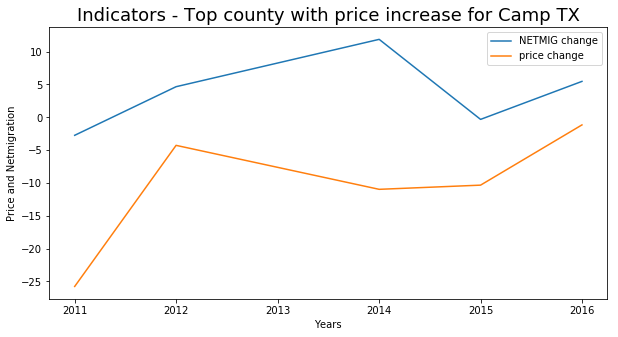

In [381]:
#df10[df10.county == 'Osceola FL'].price.plot()

df11 = df10.copy()
#print (df11)
#df11['price'] = df11['Price']*100
df11['price'] = df11['price'].apply(lambda x: x*100)

#df11[df11.county == 'Fort Bend TX'].price.plot()
#df11[df11.county == 'Fort Bend TX'].RNETMIG2016.plot()

county = 'Camp TX'	#'Fort Bend TX'

fig = plt.figure (figsize = (10,5))
ax = fig.add_subplot(111)

line = plt.plot(df11[df11.county == county].RNETMIG2016, ls='solid', label='NETMIG change')
line = plt.plot(df11[df11.county == county].price, ls='solid', label='price change')

plt.title('Indicators - Top county with price increase for '+ county, fontsize=18)

plt.xlabel('Years')
plt.ylabel('Price and Netmigration')

ax.legend(loc='best')
plt.show()



In [253]:
df10.columns

Index(['county', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'price',
       'HPIUS', 'month', 'year', 'mortgrate', 'unemp', 'cpi'],
      dtype='object')

In [300]:
import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [355]:
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing

#data = load_boston()
#data = fetch_california_housing()

dataX = df10[['HPIUS', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016','RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'mortgrate', 'unemp', 'cpi']].values
dataY = df10[['price']].values

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY)

# y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [356]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]),
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')
n_hidden = 1000
hidden1 = tf.layers.dense(X, units=n_hidden,
                          name='hidden1',
                          activation=tf.nn.relu)
y_hat = tf.layers.dense(hidden1, units=1,
                        name='y_hat',
                        activation=tf.nn.sigmoid)

loss = tf.losses.log_loss(y, y_hat)

optimizer = tf.train.AdamOptimizer(0.001)

training_op = optimizer.minimize(loss)

In [357]:
init = tf.global_variables_initializer()

test_err = []
train_err = []

with tf.Session() as sess:
    init.run()
    
    for epoch in range(1000):
        sess.run(training_op, 
                 feed_dict={X:X_train, y:y_train})
        train_loss = sess.run(loss, feed_dict={X:X_train, y:y_train})
        test_loss = sess.run(loss, feed_dict={X:X_test, y:y_test})
        test_err.append(test_loss)
        train_err.append(train_loss)
        if epoch % 100 == 0:
            print('epoch', epoch+1, train_loss, test_loss)
        
    pred = sess.run(y_hat, feed_dict={X:X_test})

epoch 1 0.6672113 0.66703963
epoch 101 -0.1582053 -0.1298745
epoch 201 -0.19531706 -0.16603418
epoch 301 -0.20083444 -0.1721376
epoch 401 -0.2033002 -0.17508562
epoch 501 -0.20450991 -0.17657892
epoch 601 -0.20522702 -0.1774163
epoch 701 -0.20573685 -0.17795487
epoch 801 -0.20614538 -0.17837077
epoch 901 -0.20648302 -0.17872491


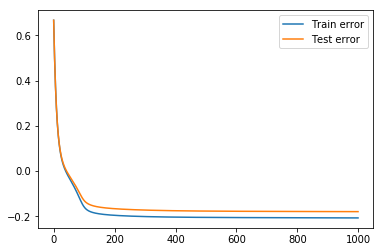

In [358]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

In [359]:
metrics.r2_score(y_test, pred)

0.08915400337110035

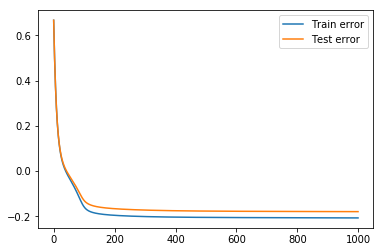

In [360]:
plt.plot(train_err, label='Train error')
plt.plot(test_err, label='Test error')
plt.legend()

In [361]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(dataX, dataY)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X_train.shape

(6915, 10)

In [362]:
from keras.models import Sequential
from keras.layers import Dense

D:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [363]:
model = Sequential()

In [364]:
input_units = X_train.shape[1]
hidden_units = input_units

model.add(Dense(hidden_units, input_dim=input_units, activation='relu'))
model.add(Dense(1))

In [365]:
from keras.optimizers import Adam

#model.compile(loss='mean_squared_error', optimizer='adam')

adam = Adam(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=adam)

In [366]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          epochs=10, batch_size=None)

Train on 6915 samples, validate on 2305 samples
Epoch 1/10
6915/6915 [==============================] - 1s 99us/step - loss: 0.0208 - val_loss: 0.0047
Epoch 2/10
6915/6915 [==============================] - 0s 28us/step - loss: 0.0046 - val_loss: 0.0042
Epoch 3/10
6915/6915 [==============================] - 0s 30us/step - loss: 0.0043 - val_loss: 0.0037
Epoch 4/10
6915/6915 [==============================] - 0s 39us/step - loss: 0.0043 - val_loss: 0.0038
Epoch 5/10
6915/6915 [==============================] - 0s 29us/step - loss: 0.0041 - val_loss: 0.0036
Epoch 6/10
6915/6915 [==============================] - 0s 28us/step - loss: 0.0040 - val_loss: 0.0037
Epoch 7/10
6915/6915 [==============================] - 0s 32us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 8/10
6915/6915 [==============================] - 0s 28us/step - loss: 0.0040 - val_loss: 0.0038
Epoch 9/10
6915/6915 [==============================] - 0s 25us/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/10
6915/6915 [==

In [372]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                    epochs=100, batch_size=None, verbose=0)

In [373]:
#plt.plot(history.history['acc'])
history

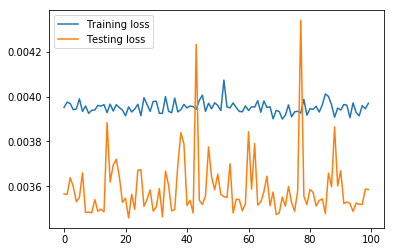

In [374]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(test_loss, label='Testing loss')
plt.legend()

In [377]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.003952,0.003567
1,0.003975,0.003563
2,0.003969,0.003638
3,0.003942,0.003598
4,0.003945,0.003531
5,0.003990,0.003551
6,0.003934,0.003659
7,0.003959,0.003483
8,0.003926,0.003485
9,0.003939,0.003481


In [393]:
df12 = df10.drop(['county', 'month','year','HPIUS'], 1)


df12 = df10.drop(['county', 'month','year','HPIUS'], 1)
lags = range(1, 5)  # Just two lags for demonstration.

df13 = df12.assign(**{
    '{} (t-{})'.format(col, t): df12[col].shift(t)
    for t in lags
    for col in df12
})


In [397]:
df13.columns
df13 = df13.dropna()

In [408]:
df13

,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,mortgrate,unemp,...,RNETMIG2016 (t-3),RNATURALINC2016 (t-3),RINTERNATIONALMIG2016 (t-3),RDOMESTICMIG2016 (t-3),RBIRTH2016 (t-3),price (t-3),HPIUS (t-3),mortgrate (t-3),unemp (t-3),cpi (t-3)
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,0.010616,-0.021505,...,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,0.010616,-0.021505,...,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,0.010616,-0.021505,...,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,0.010616,-0.021505,...,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,0.010616,-0.021505,...,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,0.010616,-0.021505,...,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,11.309054,-1.193043,1.056340,0.323116,-1.516159,12.365394,-0.104816,-0.002834,0.010616,-0.021505,...,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,9.355189,-9.574140,4.458643,1.154470,-10.728610,13.813832,-0.032852,-0.002834,0.010616,-0.021505,...,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,0.010616,-0.021505,0.004763
2011-01-01,8.884545,2.518750,3.233022,0.426057,2.092692,12.117567,-0.058377,-0.002834,0.010616,-0.021505,...,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,0.010616,-0.021505,0.004763


In [409]:
import statsmodels.api as sm
X = df13[['RDEATH2016', 'RNATURALINC2016', 'RINTERNATIONALMIG2016', 'RBIRTH2016', 'RNETMIG2016 (t-1)',
       'RNATURALINC2016 (t-1)', 'RINTERNATIONALMIG2016 (t-1)',
       'RDOMESTICMIG2016 (t-1)',  'price (t-1)',
       'mortgrate (t-1)', 'unemp (t-1)', 'cpi (t-1)',
       'RDEATH2016 (t-2)', 'RNETMIG2016 (t-2)',
       'RINTERNATIONALMIG2016 (t-2)', 'RDOMESTICMIG2016 (t-2)',
       'RBIRTH2016 (t-2)', 'price (t-2)', 'mortgrate (t-2)',
       'unemp (t-2)', 'cpi (t-2)', 'RDEATH2016 (t-3)', 'RNETMIG2016 (t-3)',
       'RNATURALINC2016 (t-3)', 'RBIRTH2016 (t-3)']]
y = df13['price']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     81.63
Date:                Sun, 08 Apr 2018   Prob (F-statistic):               0.00
Time:                        13:18:48   Log-Likelihood:                 12272.
No. Observations:                8756   AIC:                        -2.449e+04
Df Residuals:                    8730   BIC:                        -2.431e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0458      0.008     -5.586      0.000      -0.062      -0.030
RDEATH2016                  -2.377e+06   1.67e+06     -1.424      0.154   -5.65e+06    8.95e+05
RNATURALINC2016             -2.377e+06   1.67e+06     -1.424      0.154   -5.65e+06    8.95e+05
RINTERNATIONALMIG2016           0.0008      0.000      1.877      0.061    -3.7e-05       0.002
RBIRTH2016                   2.377e+06   1.67e+06      1.424      0.154   -8.95e+05    5.65e+06
RNETMIG2016 (t-1)            7.128e+05   5.64e+05      1.263      0.207   -3.94e+05    1.82e+06
RNATURALINC2016 (t-1)          -0.0002      0.000     -1.306      0.192      -0.001       0.000
RINTERNATIONALMIG2016 (t-1) -7.128e+05   5.64e+05     -1.263      0.207   -1.82e+06    3.94e+05
RDOMESTICMIG2016 (t-1)      -7.128e+05   5.64e+05     -1.263      0.207   -1.82e+06    3.94e+05
price (t-1)                     0.1555      0.011     14.561      0.000       0.135       0.176
mortgrate (t-1)                -8.4533      3.690     -2.291      0.022     -15.687      -1.220
unemp (t-1)                     9.6974      4.417      2.196      0.028       1.040      18.355
cpi (t-1)                      69.3235     33.213      2.087      0.037       4.218     134.429
RDEATH2016 (t-2)                0.0015      0.000      4.833      0.000       0.001       0.002
RNETMIG2016 (t-2)             8.18e+05   5.65e+05      1.447      0.148    -2.9e+05    1.93e+06
RINTERNATIONALMIG2016 (t-2)  -8.18e+05   5.65e+05     -1.447      0.148   -1.93e+06     2.9e+05
RDOMESTICMIG2016 (t-2)       -8.18e+05   5.65e+05     -1.447      0.148   -1.93e+06     2.9e+05
RBIRTH2016 (t-2)                0.0002      0.000      0.718      0.473      -0.000       0.001
price (t-2)                     0.1556      0.011     14.558      0.000       0.135       0.177
mortgrate (t-2)                 6.5615      3.690      1.778      0.075      -0.672      13.795
unemp (t-2)                    -7.6610      4.417     -1.735      0.083     -16.319       0.997
cpi (t-2)                     -56.6634     33.213     -1.706      0.088    -121.768       8.441
RDEATH2016 (t-3)             1.707e+06   1.67e+06      1.023      0.306   -1.56e+06    4.98e+06
RNETMIG2016 (t-3)               0.0002   7.48e-05      3.232      0.001     9.5e-05       0.000
RNATURALINC2016 (t-3)        1.707e+06   1.67e+06      1.023      0.306   -1.56e+06    4.98e+06
RBIRTH2016 (t-3)            -1.707e+06   1.67e+06     -1.023      0.306   -4.98e+06    1.56e+06
==============================================================================
Omnibus:                      565.064   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              750.539
Skew:                          -0.588   Prob(JB):             

In [410]:
df15 = df10.drop(['month','year','HPIUS'], 1)
df15

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,mortgrate,unemp,cpi
Year,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,0.010616,-0.021505,0.004763
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,0.010616,-0.021505,0.004763
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,0.010616,-0.021505,0.004763
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,0.010616,-0.021505,0.004763
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,0.010616,-0.021505,0.004763
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,0.010616,-0.021505,0.004763
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,0.010616,-0.021505,0.004763
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,0.010616,-0.021505,0.004763
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,0.010616,-0.021505,0.004763


In [437]:
df15['state'] = df15['county'].str[-2:]

#df16 = df15.drop(['county'], 1)
df16 = df15.copy()

df_state = pd.get_dummies(df16['state'])
df_new = pd.concat([df16, df_state], axis=1)
df_new


,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,mortgrate,unemp,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0


In [438]:
features = df_new.columns

print (features)

features = features.drop(['price','state','county'])

print (features)


Index(['county', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'price',
       'mortgrate', 'unemp', 'cpi', 'state', 'AL', 'AR', 'AZ', 'CA', 'CO',
       'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'MA',
       'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ',
       'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')
Index(['RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016', 'RINTERNATIONALMIG2016',
       'RDOMESTICMIG2016', 'RBIRTH2016', 'mortgrate', 'unemp', 'cpi', 'AL',
       'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC',
       'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dty

In [439]:
import statsmodels.api as sm
X = df_new[features]
y = df_new['price']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     30.93
Date:                Sun, 08 Apr 2018   Prob (F-statistic):          1.47e-294
Time:                        13:37:15   Log-Likelihood:                 12151.
No. Observations:                8759   AIC:                        -2.419e+04
Df Residuals:                    8702   BIC:                        -2.378e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0841      0.027     -3.138      0.002      -0.137      -0.032
RDEATH2016            -2.267e+06    1.7e+06     -1.335      0.182    -5.6e+06    1.06e+06
RNETMIG2016           -2.383e+04   5.76e+05     -0.041      0.967   -1.15e+06     1.1e+06
RNATURALINC2016       -2.267e+06    1.7e+06     -1.335      0.182    -5.6e+06    1.06e+06
RINTERNATIONALMIG2016  2.383e+04   5.76e+05      0.041      0.967    -1.1e+06    1.15e+06
RDOMESTICMIG2016       2.383e+04   5.76e+05      0.041      0.967    -1.1e+06    1.15e+06
RBIRTH2016             2.267e+06    1.7e+06      1.335      0.182   -1.06e+06     5.6e+06
mortgrate                -2.7909      0.128    -21.727      0.000      -3.043      -2.539
unemp                     3.0190      0.134     22.613      0.000       2.757       3.281
cpi                      18.7860      1.084     17.330      0.000      16.661      20.911
AL                        0.0285      0.026      1.084      0.278      -0.023       0.080
AR                        0.0366      0.026      1.387      0.165      -0.015       0.088
AZ                        0.0244      0.028      0.888      0.375      -0.030       0.078
CA                        0.0453      0.027      1.699      0.089      -0.007       0.097
CO                        0.0291      0.026      1.102      0.271      -0.023       0.081
CT                        0.0259      0.027      0.946      0.344      -0.028       0.079
DE                        0.0126      0.030      0.422      0.673      -0.046       0.071
FL                        0.0211      0.026      0.805      0.421      -0.030       0.073
GA                        0.0191      0.026      0.733      0.464      -0.032       0.070
HI                        0.0467      0.029      1.588      0.112      -0.011       0.104
IA                        0.0320      0.026      1.212      0.226      -0.020       0.084
ID                        0.0237      0.027      0.891      0.373      -0.028       0.076
IL                        0.0344      0.026      1.305      0.192      -0.017       0.086
IN                        0.0301      0.026      1.152      0.249      -0.021       0.081
KS                        0.0340      0.026      1.286      0.198      -0.018       0.086
KY                        0.0341      0.026      1.299      0.194      -0.017       0.085
MA                        0.0406      0.027      1.508      0.131      -0.012       0.093
MD                        0.0214      0.027      0.807      0.420      -0.031       0.074
ME                        0.0497      0.027      1.864      0.062      -0.003       0.102
MI                        0.0362      0.026      1.374      0.170      -0.015       0.088
MN                        0.0288      0.026      1.096      0.273      -0.023       0.080
MO                     

In [440]:
df_new[features]

,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,mortgrate,unemp,cpi,AL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,0.010616,-0.021505,0.004763,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,0.010616,-0.021505,0.004763,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,0.010616,-0.021505,0.004763,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,0.010616,-0.021505,0.004763,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,0.010616,-0.021505,0.004763,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,0.010616,-0.021505,0.004763,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,0.010616,-0.021505,0.004763,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,0.010616,-0.021505,0.004763,1,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,0.010616,-0.021505,0.004763,1,...,0,0,0,0,0,0,0,0,0,0


In [441]:
df_new

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,mortgrate,unemp,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,0.010616,-0.021505,...,0,0,0,0,0,0,0,0,0,0


In [547]:
#features = df12.columns
#features = features.drop(['price','state','county'])
#= df10.drop(['county', 'month','year','HPIUS'], 1)


df12 = df10.copy() #drop(['county', 'month','year','HPIUS'], 1)
lags = range(1, 3)  # Just two lags for demonstration.

df17 = df12.assign(**{
    '{} (t-{})'.format(col, t): df12[col].shift(t)
    for t in lags
    for col in df12
})

df17

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,month,...,RINTERNATIONALMIG2016 (t-2),RDOMESTICMIG2016 (t-2),RBIRTH2016 (t-2),price (t-2),HPIUS (t-2),month (t-2),year (t-2),mortgrate (t-2),unemp (t-2),cpi (t-2)
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1,...,0.327282,5.836523,11.563952,-0.024568,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1,...,0.989585,14.768069,11.831760,-0.093731,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1,...,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,1,...,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,1,...,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,1,...,0.076849,6.109510,8.491835,-0.148970,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,1,...,1.728471,0.993374,13.490022,-0.076972,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763


In [548]:
cols_to_use = df_new.columns - df17.columns


TypeError: cannot perform __sub__ with this index type: <class 'pandas.core.indexes.base.Index'>

In [569]:
#df18 = pd.merge(df_new, df17, left_on=['Year','county'],right_on=['Year','county'], left_index=True, right_index=True) 


df18 = pd.merge(df_new.reset_index(), df17.reset_index(), on=['Year','county'], how='outer', suffixes=('', '_y')) 

#df18 = df_new.join(df17, on=['Year','county'])

df18
#df9 = pd.merge(HPIUS, df8, left_on=['month', 'year'],right_on=['month', 'year'])


,Year,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,mortgrate,...,RINTERNATIONALMIG2016 (t-2),RDOMESTICMIG2016 (t-2),RBIRTH2016 (t-2),price (t-2),HPIUS (t-2),month (t-2),year (t-2),mortgrate (t-2),unemp (t-2),cpi (t-2)
0,2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,0.010616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,0.010616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,0.010616,...,0.327282,5.836523,11.563952,-0.024568,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
3,2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,0.010616,...,0.989585,14.768069,11.831760,-0.093731,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
4,2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,0.010616,...,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
5,2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,0.010616,...,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
6,2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,0.010616,...,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
7,2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,0.010616,...,0.076849,6.109510,8.491835,-0.148970,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
8,2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,0.010616,...,1.728471,0.993374,13.490022,-0.076972,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763
9,2011-01-01,Cullman AL,11.309054,-1.193043,1.056340,0.323116,-1.516159,12.365394,-0.104816,0.010616,...,0.568907,0.146815,11.084501,-0.017720,-0.002834,1.0,2011.0,0.010616,-0.021505,0.004763


In [570]:
df18.columns

Index(['Year', 'county', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'price',
       'mortgrate',
       ...
       'RINTERNATIONALMIG2016 (t-2)', 'RDOMESTICMIG2016 (t-2)',
       'RBIRTH2016 (t-2)', 'price (t-2)', 'HPIUS (t-2)', 'month (t-2)',
       'year (t-2)', 'mortgrate (t-2)', 'unemp (t-2)', 'cpi (t-2)'],
      dtype='object', length=102)

In [571]:
df18.set_index('Year', inplace=True)



In [572]:
features = df18.columns

print (features)

features = features.drop(['price','state','county', 'year', 'month', 'HPIUS', 'RNETMIG2016'])

print (features)



Index(['county', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'price',
       'mortgrate', 'unemp',
       ...
       'RINTERNATIONALMIG2016 (t-2)', 'RDOMESTICMIG2016 (t-2)',
       'RBIRTH2016 (t-2)', 'price (t-2)', 'HPIUS (t-2)', 'month (t-2)',
       'year (t-2)', 'mortgrate (t-2)', 'unemp (t-2)', 'cpi (t-2)'],
      dtype='object', length=101)
Index(['RDEATH2016', 'RNATURALINC2016', 'RINTERNATIONALMIG2016',
       'RDOMESTICMIG2016', 'RBIRTH2016', 'mortgrate', 'unemp', 'cpi', 'AL',
       'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC',
       'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI',
       'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY',
       'RDEATH2016_y', 'RNETMIG2016_y', 'RNATURALINC2016_y',
       'RINTERNATIONALMIG2016_y', 'RDOMESTICMIG2016_y', 'RBIRTH2016_y

In [573]:
features = [x for x in features if "_y" not in x]
#features = [x for x in features if "price" not in x]
features = [x for x in features if "month" not in x]
features = [x for x in features if "year" not in x]
features = [x for x in features if "HPIUS" not in x]
features = [x for x in features if "county" not in x]


#features

In [574]:
df18=  df18.dropna() #['price']
df18[features]

,RDEATH2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,mortgrate,unemp,cpi,AL,AR,...,RDEATH2016 (t-2),RNETMIG2016 (t-2),RNATURALINC2016 (t-2),RINTERNATIONALMIG2016 (t-2),RDOMESTICMIG2016 (t-2),RBIRTH2016 (t-2),price (t-2),mortgrate (t-2),unemp (t-2),cpi (t-2)
Year,,,,,,,,,,,,,,,,,,,,,
2011-01-01,11.632586,0.621868,-0.146322,-1.133994,12.254454,0.010616,-0.021505,0.004763,1,0,...,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,0.010616,-0.021505,0.004763
2011-01-01,9.871136,3.058662,-0.052136,1.807391,12.929798,0.010616,-0.021505,0.004763,1,0,...,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,0.010616,-0.021505,0.004763
2011-01-01,12.950211,-1.174622,0.910332,-2.496072,11.775588,0.010616,-0.021505,0.004763,1,0,...,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,0.010616,-0.021505,0.004763
2011-01-01,11.911623,-3.419789,0.076849,6.109510,8.491835,0.010616,-0.021505,0.004763,1,0,...,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,0.010616,-0.021505,0.004763
2011-01-01,10.092682,3.397340,1.728471,0.993374,13.490022,0.010616,-0.021505,0.004763,1,0,...,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,0.010616,-0.021505,0.004763
2011-01-01,12.314073,-1.229572,0.568907,0.146815,11.084501,0.010616,-0.021505,0.004763,1,0,...,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,0.010616,-0.021505,0.004763
2011-01-01,12.890980,-0.685410,0.184533,6.748652,12.205570,0.010616,-0.021505,0.004763,1,0,...,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,0.010616,-0.021505,0.004763
2011-01-01,11.309054,1.056340,0.323116,-1.516159,12.365394,0.010616,-0.021505,0.004763,1,0,...,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,0.010616,-0.021505,0.004763
2011-01-01,9.355189,4.458643,1.154470,-10.728610,13.813832,0.010616,-0.021505,0.004763,1,0,...,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,0.010616,-0.021505,0.004763


In [575]:
#df18.dtypes

mylist = list(df18[features].select_dtypes(include=['object']).columns)
mylist

#features = features.drop(mylist)



[]

In [576]:
#features

In [577]:
features

['RDEATH2016',
 'RNATURALINC2016',
 'RINTERNATIONALMIG2016',
 'RDOMESTICMIG2016',
 'RBIRTH2016',
 'mortgrate',
 'unemp',
 'cpi',
 'AL',
 'AR',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY',
 'RDEATH2016 (t-1)',
 'RNETMIG2016 (t-1)',
 'RNATURALINC2016 (t-1)',
 'RINTERNATIONALMIG2016 (t-1)',
 'RDOMESTICMIG2016 (t-1)',
 'RBIRTH2016 (t-1)',
 'price (t-1)',
 'mortgrate (t-1)',
 'unemp (t-1)',
 'cpi (t-1)',
 'RDEATH2016 (t-2)',
 'RNETMIG2016 (t-2)',
 'RNATURALINC2016 (t-2)',
 'RINTERNATIONALMIG2016 (t-2)',
 'RDOMESTICMIG2016 (t-2)',
 'RBIRTH2016 (t-2)',
 'price (t-2)',
 'mortgrate (t-2)',
 'unemp (t-2)',
 'cpi (t-2)']

In [578]:
import statsmodels.api as sm

#features = features.drop('RNETMIG2016')


X = df18[features]
y = df18['price']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()


est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     30.82
Date:                Sun, 08 Apr 2018   Prob (F-statistic):               0.00
Time:                        14:38:39   Log-Likelihood:                 12387.
No. Observations:                8757   AIC:                        -2.462e+04
Df Residuals:                    8681   BIC:                        -2.408e+04
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0914      0.104      0.879      0.379      -0.112       0.295
RDEATH2016                  -2.325e+06   1.66e+06     -1.403      0.161   -5.57e+06    9.23e+05
RNATURALINC2016             -2.325e+06   1.66e+06     -1.403      0.161   -5.57e+06    9.23e+05
RINTERNATIONALMIG2016           0.0015      0.000      3.111      0.002       0.001       0.002
RDOMESTICMIG2016                0.0010   7.87e-05     13.060      0.000       0.001       0.001
RBIRTH2016                   2.325e+06   1.66e+06      1.403      0.161   -9.23e+05    5.57e+06
mortgrate                      -2.7107      3.656     -0.741      0.458      -9.877       4.456
unemp                           4.8906      4.374      1.118      0.264      -3.683      13.464
cpi                            27.0599     32.893      0.823      0.411     -37.418      91.538
AL                             -0.1516      0.103     -1.466      0.143      -0.354       0.051
AR                             -0.1468      0.103     -1.420      0.156      -0.349       0.056
AZ                             -0.1539      0.104     -1.484      0.138      -0.357       0.049
CA                             -0.1377      0.104     -1.330      0.184      -0.341       0.065
CO                             -0.1468      0.103     -1.420      0.156      -0.350       0.056
CT                             -0.1509      0.104     -1.454      0.146      -0.354       0.053
DE                             -0.1606      0.104     -1.540      0.124      -0.365       0.044
FL                             -0.1602      0.103     -1.548      0.122      -0.363       0.043
GA                             -0.1574      0.103     -1.522      0.128      -0.360       0.045
HI                             -0.1332      0.104     -1.278      0.201      -0.338       0.071
IA                             -0.1483      0.103     -1.434      0.151      -0.351       0.054
ID                             -0.1527      0.103     -1.476      0.140      -0.355       0.050
IL                             -0.1440      0.103     -1.392      0.164      -0.347       0.059
IN                             -0.1487      0.103     -1.438      0.151      -0.351       0.054
KS                             -0.1458      0.103     -1.410      0.158      -0.348       0.057
KY                             -0.1472      0.103     -1.423      0.155      -0.350       0.056
MA                             -0.1425      0.104     -1.376      0.169      -0.346       0.061
MD                             -0.1554      0.104     -1.501      0.133      -0.358       0.048
ME                             -0.1354      0.104     -1.306      0.192      -0.339       0.068
MI                             -0.1449      0.103     -1.401      0.161      -0.348       0.058
MN         

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


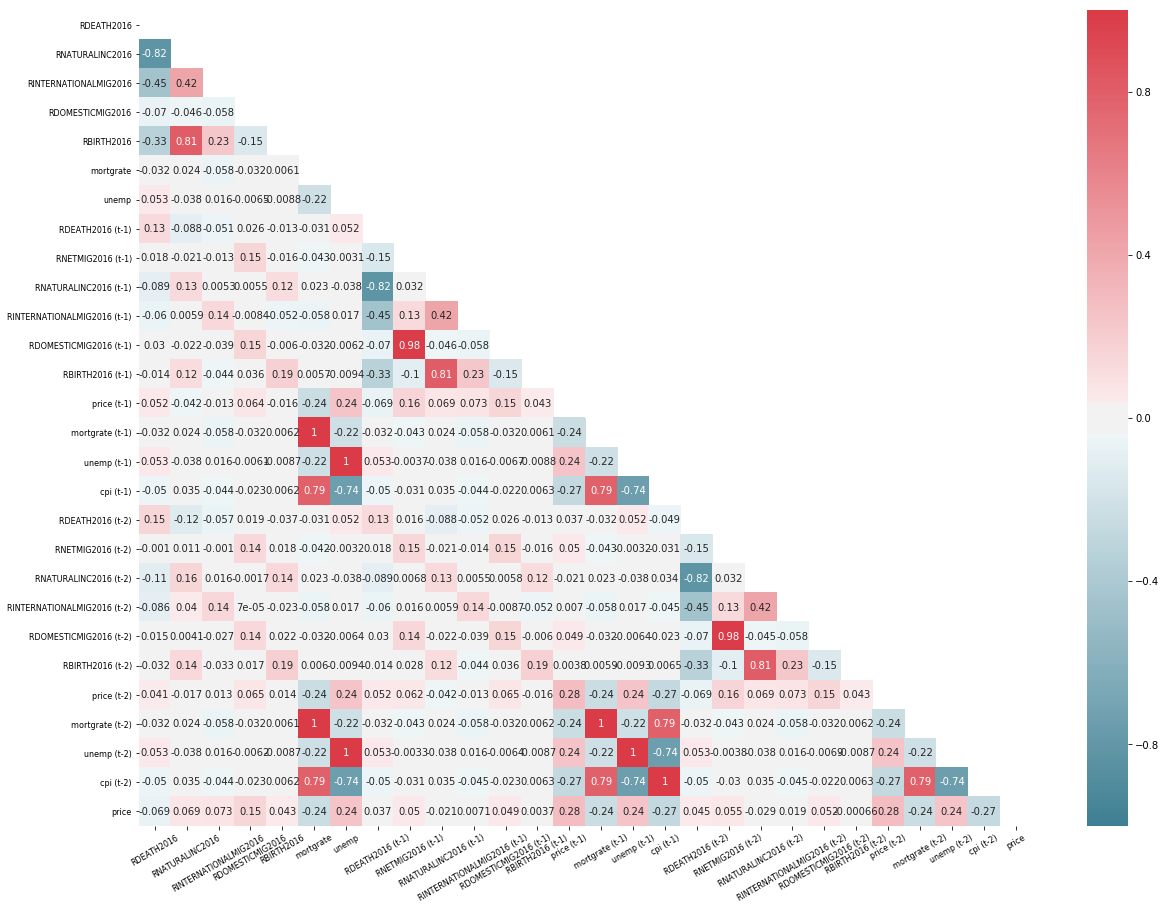

In [579]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(20,15))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=8, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=8, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

df_with_target = df18[['RDEATH2016',
 'RNATURALINC2016',
 'RINTERNATIONALMIG2016',
 'RDOMESTICMIG2016',
 'RBIRTH2016',
 'mortgrate',
 'unemp',
  'RDEATH2016 (t-1)',
 'RNETMIG2016 (t-1)',
 'RNATURALINC2016 (t-1)',
 'RINTERNATIONALMIG2016 (t-1)',
 'RDOMESTICMIG2016 (t-1)',
 'RBIRTH2016 (t-1)',
 'price (t-1)',
 'mortgrate (t-1)',
 'unemp (t-1)',
 'cpi (t-1)',
 'RDEATH2016 (t-2)',
 'RNETMIG2016 (t-2)',
 'RNATURALINC2016 (t-2)',
 'RINTERNATIONALMIG2016 (t-2)',
 'RDOMESTICMIG2016 (t-2)',
 'RBIRTH2016 (t-2)',
 'price (t-2)',
 'mortgrate (t-2)',
 'unemp (t-2)',
 'cpi (t-2)',
 'price']].copy()
df18['price'] = y
correlation_heat_map(df_with_target)

In [582]:
features.append('price')

In [584]:
df18[features].to_pickle('df18.p')